# Loading and investigating the dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# lload in dataset and check keys
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# description of datset
description = boston['DESCR']
print(description)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# list of feature data names
feature_names = boston['feature_names']
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
# feature data
X = boston['data']
X.shape

(506, 13)

In [6]:
# target data
y = boston['target']
y.shape

(506,)

In [7]:
# put data into pandas DataFrame
boston_df = pd.DataFrame(X)
# assign feature variable names to header
boston_df.columns = feature_names
# add target data to dataframe
boston_df['MEDV'] = y

# Exploratory Data Analysis

In [8]:
# check the first few rows of dataset
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# determine the number of mission values(NaN)
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
# summary statistics
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


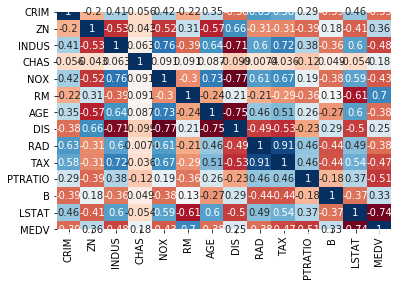

In [14]:
# data correlations
correlations = boston_df.corr()
# plot result
sns.heatmap(correlations, cmap = 'RdBu', annot=True, cbar=0)
plt.show()

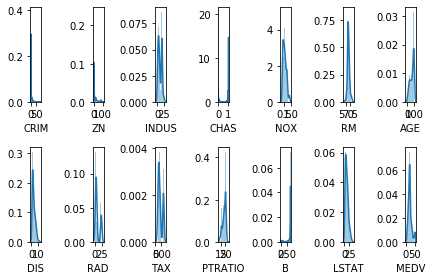

In [18]:
# plot histograms
# create 14 subplots
fig, axs = plt.subplots(ncols = 7, nrows = 2)
i = 0
axs = axs.flatten()

# items method returns a tuple of variable names & values
for key, value in boston_df.items():
    sns.distplot(value, ax=axs[i])
    i += 1
plt.tight_layout()

# Data Preprocessing and Feature selection

In [21]:
X_df = boston_df[['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
print(X_df.head())

y_df = boston_df[['MEDV']]
print(y_df.head())

# convert data to numpy arrays
X = np.array(X_df)
y = np.array(y_df)

   INDUS    NOX     RM    TAX  PTRATIO  LSTAT
0   2.31  0.538  6.575  296.0     15.3   4.98
1   7.07  0.469  6.421  242.0     17.8   9.14
2   7.07  0.469  7.185  242.0     17.8   4.03
3   2.18  0.458  6.998  222.0     18.7   2.94
4   2.18  0.458  7.147  222.0     18.7   5.33
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [22]:
# normalize all feature variables to range from 0-1
from sklearn import preprocessing
normalizer = preprocessing.MinMaxScaler()
X = normalizer.fit_transform(X)

# Training the model

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import SCORERS
from sklearn.model_selection import cross_val_score

In [24]:
# training the model
multilinear = LinearRegression()

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# check out the size of each dataset
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (379, 6)
X_test.shape:  (127, 6)
y_train.shape:  (379, 1)
y_test.shape:  (127, 1)


In [25]:
# fit the model on the training data
multilinear.fit(X_train, y_train)

# make prediction on the testing data
y_pred = multilinear.predict(X_test)

In [26]:
# compare actual and predicted target values
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  4.130606612285673


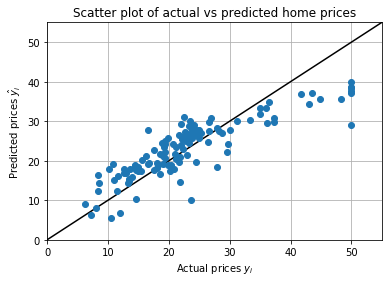

In [27]:
# scatterplot of actual vs. predicted prices
t = np.linspace(0, 55, 55)

plt.figure()
plt.grid()
plt.scatter(y_test, y_pred, zorder=3)
plt.plot(t, t, 'k')
plt.axis([0, 55, 0, 55])
plt.xlabel('Actual prices $y_i$')
plt.ylabel('Predicted prices $\hat{y}_i$')
plt.title('Scatter plot of actual vs predicted home prices')
plt.show()

In [33]:
# k-fold cross validation
scores = cross_val_score(multilinear, X, y, cv=20, scoring='neg_mean_absolute_error')
global_mean_score = np.mean(-1 * scores)
global_stdv_score = np.std(-1 * scores)

print(global_mean_score)
print(global_stdv_score)

4.018846998707698
2.479545560282286
